In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import json
import numpy as np

# open files
df_hdiy = pd.read_csv('../data/cleaned_hdi_py_data.csv')

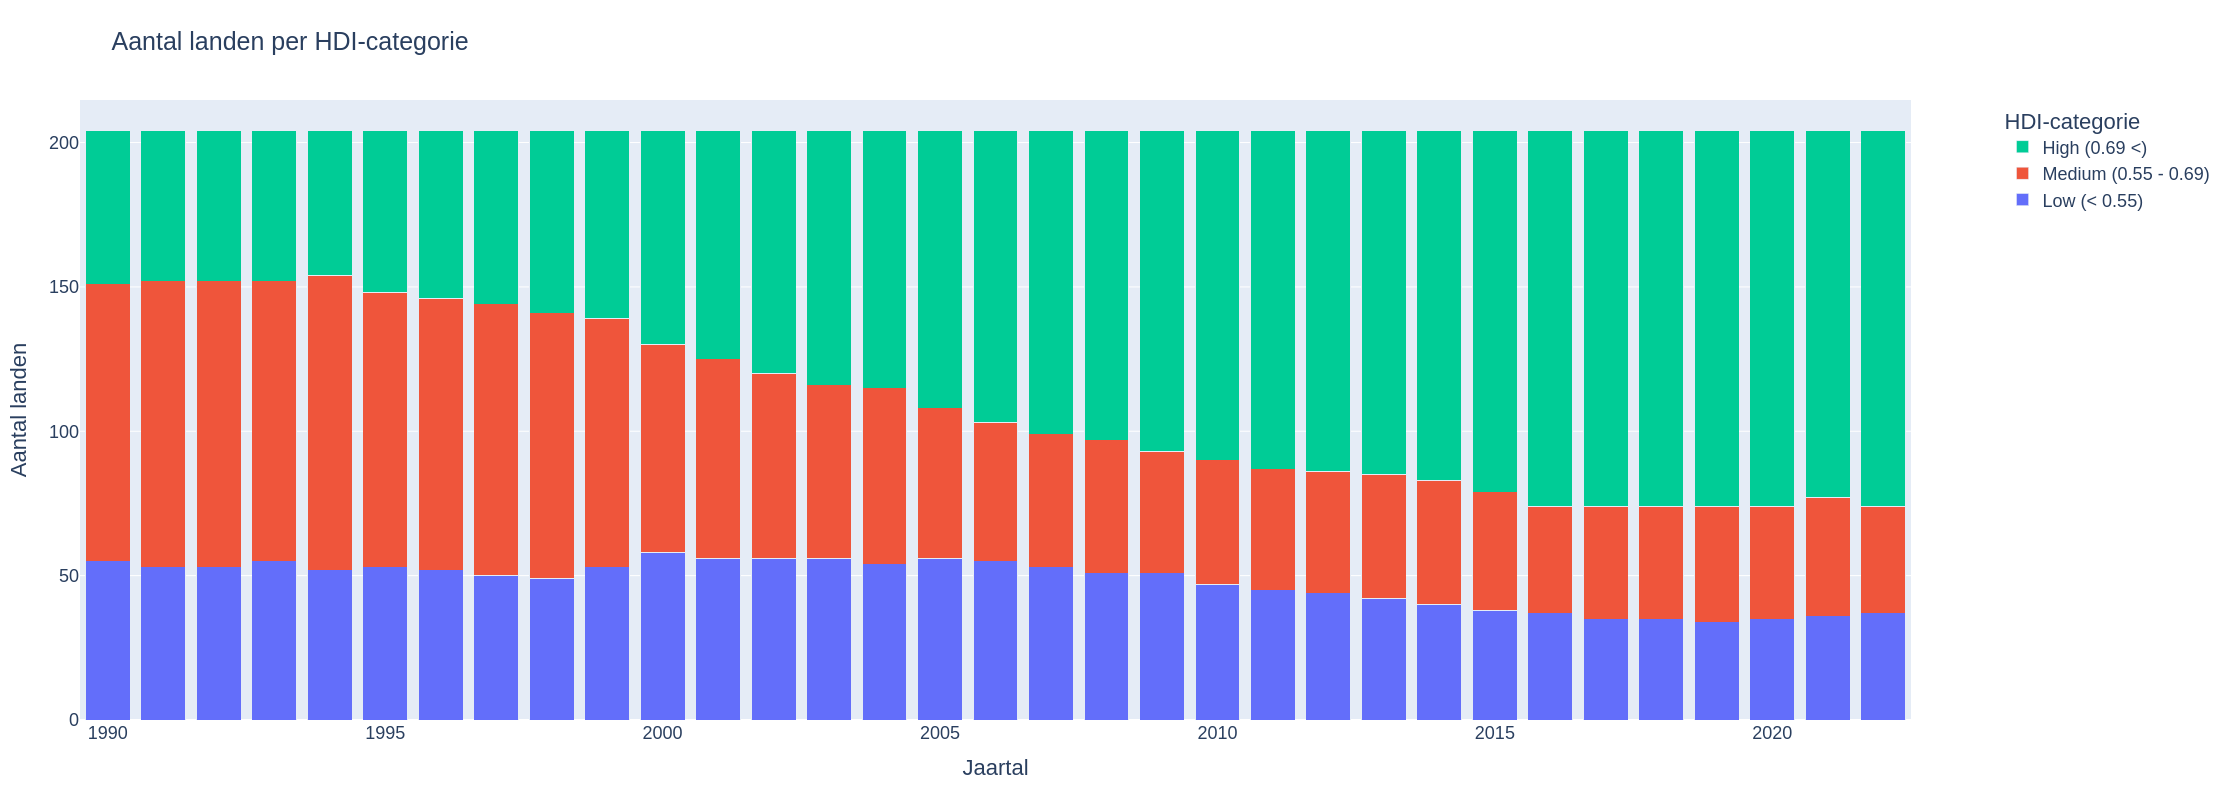

In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

years = list(range(1990, 2023))
hdi_columns = [f'hdi_{year}' for year in years]
df_hdiyn = df_hdiy[['country'] + hdi_columns]

# Melt the DataFrame to long format for easier plotting
df_melted = df_hdiyn.melt(id_vars=['country'], var_name='year', value_name='hdi')

# Convert year to numeric
df_melted['year'] = df_melted['year'].str.extract('(\d+)').astype(int)

# Define bins and labels for HDI categories
bins = [0, 0.55, 0.69, 1.0]
labels = ['Low (< 0.55)', 'Medium (0.55 - 0.69)', 'High (0.69 <)']

# Bin the HDI values
df_melted['category'] = pd.cut(df_melted['hdi'], bins=bins, labels=labels, include_lowest=True)

# Group by year and category
df_grouped = df_melted.groupby(['year', 'category'], observed=True).size().unstack(fill_value=0).reset_index()

# Create the plot
fig = go.Figure()

# Add traces for each category
for category in labels:
    fig.add_trace(go.Bar(
        x=df_grouped['year'],
        y=df_grouped[category],
        name=category
    ))

# Update layout
fig.update_layout(
    barmode='stack',
    title='Aantal landen per HDI ategorie',
    xaxis=dict(title='Jaartal'),
    yaxis=dict(title='Aantal landen'),
    legend=dict(title='HDI-categorie', x=1.05, y=1),
    font=dict(size=18),
    autosize=False,
    width=1200,
    height=800
)

fig.show()
